In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
df = pd.read_csv("email.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5573, 2)

1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model evaluation
5. Evaluation
6. Improvement
7. Website 
8. Deployment


## 1. Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

In [9]:
df['Category'] = encoder.fit_transform(df['Category']) #this line of code basically oncodes ham and spam to the 
                                                       #binary 0 and 1 respectively.

In [10]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#check for missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
#check for duplicate values and remove them
df.duplicated().sum()
df = df.drop_duplicates(keep = 'first')

In [13]:
df.shape

(5158, 2)

## Data Analysis

In [14]:
df['Category'].value_counts()

0    4516
1     641
2       1
Name: Category, dtype: int64

In [15]:
df.drop(df[df['Category'] == 2].index, inplace=True)


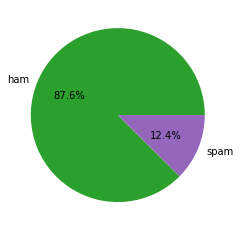

In [16]:
colors = ['#2ca02c', '#9467bd'] 
plt.pie(df['Category'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.1f%%", colors = colors)
plt.show()

In [16]:
#we can note that our data is a bit unbalanced having more ham than spam

In [17]:
nltk.download('punkt') #its a package for preprocessing data for further analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JIMMY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['no_characters'] = df['Message'].apply(len) # numberof characters in a message

In [19]:
df.head()

,Category,Message,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#no of words in a message
df['no_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x))) 

In [21]:
df.head()

,Category,Message,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#sentence
df['no_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,Category,Message,no_characters,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
#we view the descriptive statistics
df.describe()

,Category,no_characters,no_words,no_sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.557882,1.950553
std,0.329952,58.382922,13.406024,1.362981
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [25]:
#we now view the desriptive statistics of ham 
df[df['Category'] == 0][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='no_characters', ylabel='Count'>

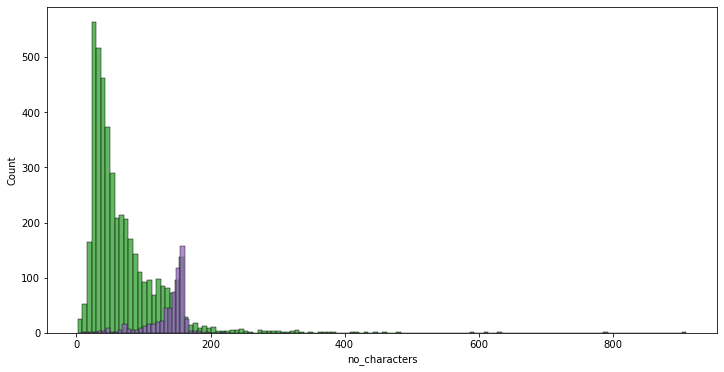

In [26]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['Category'] == 0]['no_characters'],color = '#2ca02c')
sns.histplot(df[df['Category'] == 1]['no_characters'],color = '#9467bd')

<AxesSubplot:xlabel='no_words', ylabel='Count'>

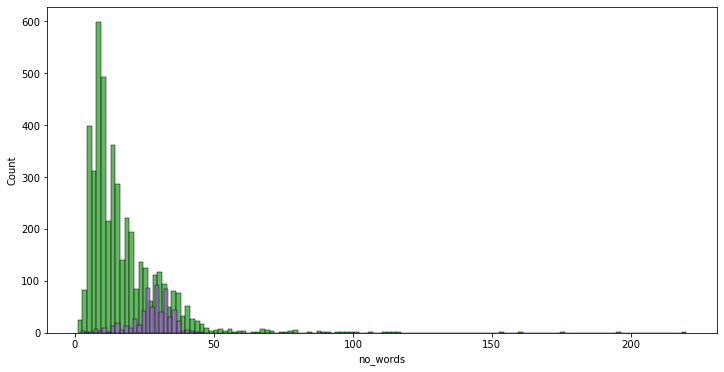

In [27]:
plt.figure(figsize= (12,6))
sns.histplot(df[df['Category'] == 0]['no_words'],color = '#2ca02c')
sns.histplot(df[df['Category'] == 1]['no_words'],color = '#9467bd')

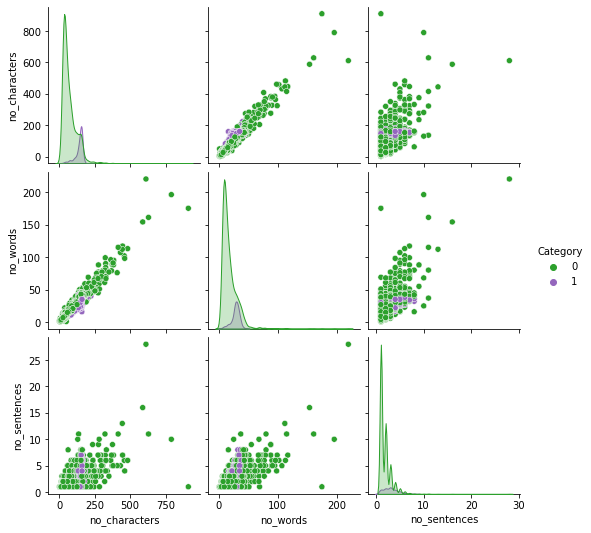

In [104]:
colors = ['#2ca02c', '#9467bd']  
sns.pairplot(df, hue='Category', palette=colors)

# Show the plot
plt.show()


<AxesSubplot:>

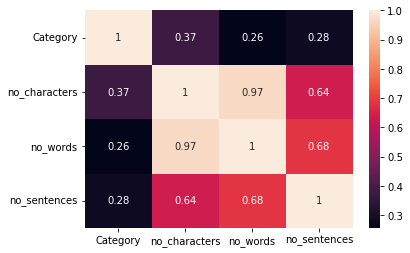

In [35]:
sns.heatmap(df.corr(),annot = True)

# Data processing

we shall perform the following:
1. Lower case
2. Tokenization # breaking sentences into words
3. Removing special characters # for simplicity
4. Removing stop words and punctuation
5. Stemming

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')  # You need to download the stopwords dataset

ps = PorterStemmer()

def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)  # It's 'word_tokenize', not 'word_tokenization'

    y = []
    for i in message:
        if i.isalnum():
            y.append(i)

    message = y[:]
    y.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:  # Use 'stopwords.words('english')'
            y.append(i)

    message = y[:]
    y.clear()

    for i in message:
        y.append(ps.stem(i))

    return " ".join(y)

new_line = transform_message("I enjoy being a software engineering, and even though it hasn't paid off, it will eventually")
print(new_line)


enjoy softwar engin even though paid eventu


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JIMMY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('driving')

'drive'

In [32]:
df['transformed_Message'] = df['Message'].apply(transform_message)

In [33]:
df.head()

,Category,Message,no_characters,no_words,no_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
# from wordcloud import WordCloud
# wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'red')

In [2]:
# from wordcloud import WordCloud

# # Specify the path to the Arial TrueType font file
# font_path = 'C:\\Users\\JIMMY\\Desktop\\Desktop2\\MACHINE LEARNING PROJECTS\\email-sparm-classifier\\Fonts.ttf'

# # Create a WordCloud instance with the specified font
# wc = WordCloud(font_path=font_path)

# # Generate the word cloud
# spam_wc = wc.generate(df[df['Category'] == 1]['transformed_Message'].str.cat(sep=" "))

# # Display the word cloud
# import matplotlib.pyplot as plt
# plt.imshow(spam_wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()


In [34]:
# to find out the total no of words we have in spam
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [35]:
len(spam_corpus)

9781

C:\Users\JIMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


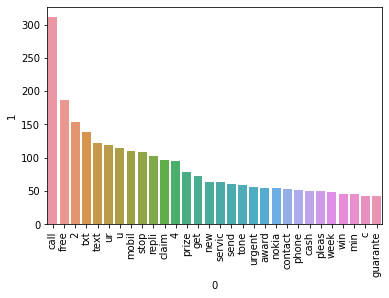

In [36]:
#we can represent words in a chart
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [37]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\JIMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


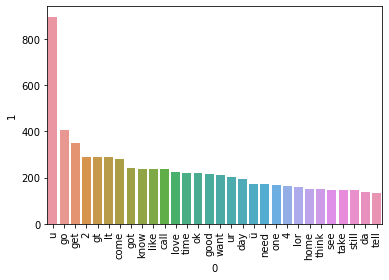

In [38]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [39]:
len(ham_corpus)

35930

# 4. Build our model

when bulding the model, i firs vectiorize my data and try to find out which model will give me the best accuracy. This will further determine what model to use. I choose to test three models, a bernoulli, multinormal and gausian models. lets code!!!

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [41]:
X = tfidf.fit_transform(df['transformed_Message']).toarray()

In [42]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
#view characters we have and word count respectively.
X.shape


(5157, 3000)

In [44]:
y = df['Category'].values

In [ ]:
y

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 2)

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8662790697674418
[[784 121]
 [ 17 110]]
0.47619047619047616


In [55]:
# note the array of zero false positive and good accuracy score 
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [57]:
#note the array size and false positive values in consideration
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [58]:
# i choose to work with tfidf and mnb

In [67]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [91]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnd = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l2')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [92]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [93]:
# performance check
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [94]:
train_classifier(svc, X_train, y_train, X_test, y_test )

(0.9757751937984496, 0.9811320754716981)

In [95]:
# checking through the performnace of all the models we have used and its very much amusing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Create a Logistic Regression classifier with 'l2' penalty
# clf = LogisticRegression(penalty='l1')

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test )
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9602713178294574
Precision -  0.967391304347826
For  RF
Accuracy -  0.9738372093023255
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941
For  xgb
Accuracy -  0.9738372093023255
Precision -  0.9716981132075472


In [98]:
#create a dataframe to store and compare the accuracy and precision of the different algorithm
# Assuming clfs, accuracy_scores, and precision_scores are defined
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
performance_df = performance_df.sort_values('Precision', ascending=False)

In [99]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.973837,1.000000
8,ETC,0.977713,0.990566
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
10,xgb,0.973837,0.971698
4,LR,0.960271,0.967391
6,AdaBoost,0.966085,0.942308
7,BgC,0.961240,0.891892


In [100]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.970930
2,RF,Accuracy,0.973837
3,ETC,Accuracy,0.977713
4,SVC,Accuracy,0.975775
5,GBDT,Accuracy,0.955426
6,xgb,Accuracy,0.973837
7,LR,Accuracy,0.960271
8,AdaBoost,Accuracy,0.966085
9,BgC,Accuracy,0.961240


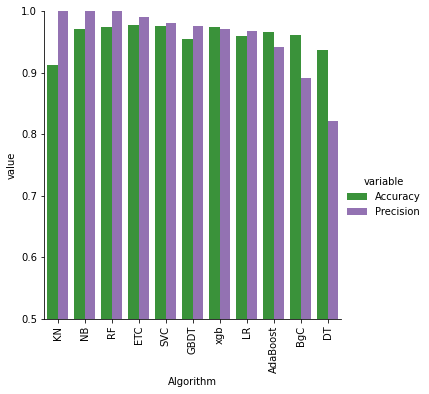

In [105]:
#visualise this for a depper understanding
sns.catplot(x = 'Algorithm', y = 'value',
               hue = 'variable', data = performance_df1, kind = 'bar', height = 5, palette=colors)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

"""
we want to twich and improve our model for optmal performance. Basically what am doing is if i have 10000 words like
i saw earlier for the spam and ham, I cant go with all the 10,000 records. I ll just scale off the model and use a max length
of 3000 characters as the limit. This shall increase the precision
"""  


In [126]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores})
temp_df = temp_df.sort_values('Accuracy_max_ft_3000', ascending=False)

In [127]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [128]:
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

In [129]:
temp_df = pd.DataFrame({'Algorithm' :clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars': precision_scores}).sort_values('Accuracy_num_chars', ascending=False)

In [130]:
new_df_scaled.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,RF,0.973837,1.000000,0.973837,1.000000,0.973837,1.000000,0.973837,1.000000
3,ETC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
4,SVC,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,xgb,0.973837,0.971698,0.973837,0.971698,0.973837,0.971698,0.973837,0.971698
7,LR,0.960271,0.967391,0.960271,0.967391,0.960271,0.967391,0.960271,0.967391
8,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
9,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892


In [150]:
# now I vote classify and save the model
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier

In [132]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [134]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [151]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9825581395348837
Precision 1.0


In [147]:
# also choose to test on the stacking classifier one last time for clarity.
#applying stacking
estimators = [('svm', svc), ('nb', etc)]
final_estimator = RandomForestClassifier()

In [146]:
from sklearn.ensemble import StackingClassifier

In [148]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [149]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9767441860465116
Precision 0.9327731092436975


In [153]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [158]:
#saving my model
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Sample text data with corresponding labels (replace with your actual data)
X_train = np.array(["Sample text 1", "Sample text 2", "Sample text 3"])
y_train = [0, 1, 0]  # 1 represents positive

# Convert X_train to a list
X_train_list = X_train.tolist()

# Create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train_list)

# Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
    
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)
